# Exploratory Data Analysis (EDA)

## Scope of this project
Get familiar with the _King County Housing Data_ and perform an **Exploratory Data Analysis** (EDA) with focus on the following particular requests by the stakeholder.

The stakeholder: <br>
Nicole Johnson, buyer, who seeks for a "Lively, central neighborhood, middle price range, right timing (within a year)"

---------------------------
# Table of Content
1) Import and first impression of the dataset
2) Initial Hypotheses about the Dataset
3) Explore and clean the dataset
    - Add/remove columns
    - Filtering
    - Testing the hypotheses
4) Recommendations for the stakeholder
-------------------------------


## 1) Import and first impression of the dataset

First of all, we will load the data into the workspace as a _dataframe object_ using **_pandas_** and display the main characteristics of it.

In [35]:
# import the necessary libraries we need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [36]:
# import dataset
df = pd.read_csv('data/King_County_House_prices_dataset.csv', parse_dates=['date'])
df

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [37]:
# So, what size does the dataset has?
print("\n", f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.", "\n")

# Now, let us take a view to the columns and their type:
df.info()


 The dataset has 21597 rows and 21 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 no

- For most of the columns the dtype looks reasonable except for _sqft_basement_ which is of type "object", but we expect it to be a "float" since the variable gives us the size of the basement in square feet.
- For _waterfront_ we see that it is a "float64" and not boolean as we might have thought (either the house has a waterfront or not). So, lets have a quick view:

In [38]:
df.waterfront.unique()


array([nan,  0.,  1.])

We see, rather than TRUE/FALSE the column has already been one-hot encoded and contains 0/1 as well as nan (not a number).<br>
Speaking of nan, how many nan do we have in each column?

In [39]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Except for _waterfront_, _yr_renovated_ and _view_ the variables (i.e. columns) are complete in the sense that no missing values appear.<br>
But, additionally let us check wether there are any duplications or multiple entries which need to be cleaned.

In [40]:
df["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Indeed, the _id_ which is unique for each house has 177 duplications. So, are there really duplications of complete rows or does the house id just occur more than once? (For example indicating that a house has been bought and sold several times within the given time period) 

In [41]:
df.duplicated().unique()

array([False])

As there is not a single TRUE value, there are no duplications of complete rows. So, for now we will keep them. <br>
Lastly, we will take a brief view on some basic descriptive statistical parameters for each variable:

In [42]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

Here, allthough being numeric, statistics for variables such as _id_, _waterfront_, _zipcode_, _latitude_ and _longitude_ can be ignored.  
To get more insights, let's visualise some variables of the table which might be of special interest for our purpose (i.e. the requests of the stakeholder):
- the _price_
- the _year built_ (and _year renovated_ if applicable)
- the _living size_ and overall _(lot) size_ of the houses
- quality - specified via _condition_ and _grade_

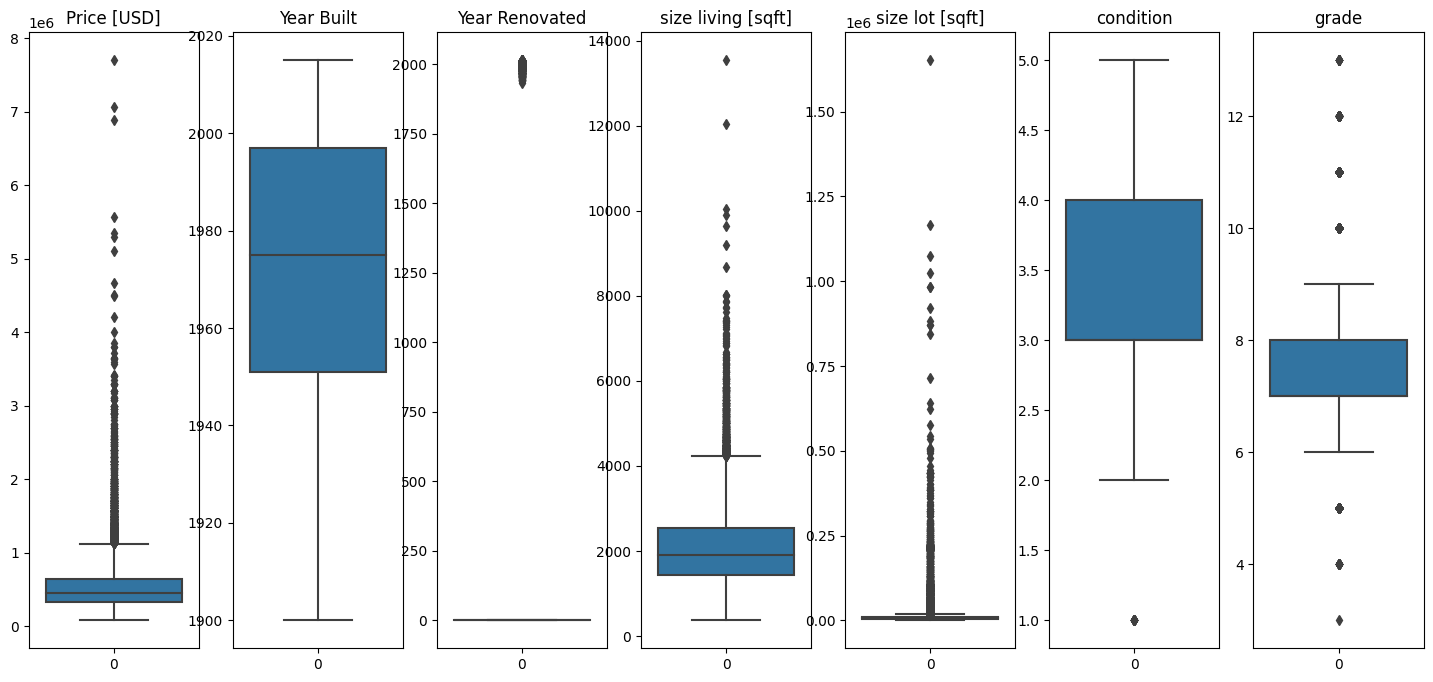

In [43]:
fig, axes = plt.subplots(1, 7, figsize=(18, 8))

sns.boxplot(ax=axes[0], data=df.price)
sns.boxplot(ax=axes[1], data=df.yr_built)
sns.boxplot(ax=axes[2], data=df['yr_renovated'])
sns.boxplot(ax=axes[3], data=df['sqft_living'])
sns.boxplot(ax=axes[4], data=df['sqft_lot'])
sns.boxplot(ax=axes[5], data=df['condition'])
sns.boxplot(ax=axes[6], data=df['grade'])

axes[0].set_title('Price [USD]')
axes[1].set_title('Year Built')
axes[2].set_title('Year Renovated')
axes[3].set_title('size living [sqft]')
axes[4].set_title('size lot [sqft]')
axes[5].set_title('condition')
axes[6].set_title('grade');

**First insights regarding the overall data:** <br>
- we can see that variables _price_, _sqft_living_ and _sqft_lot_ appear to be right skewed distributed as these have a couple of outliers towards higher values 
- _yr_built_ and _condition_ seem to have a rather symmetrical distribution
- for most of the houses, the _grade_ varies between 6 and 9 with a few outliers towards both sides of the distribution 
- the variable _yr_renovated_ seems to be corrupted. So lets have a look at the values:

In [44]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

So, there are both nan and zeros which we need to have in mind when proceeding with the data cleaning. We already know that there are 3842 nan, so let's count the zeros, as well:

In [45]:
(df['yr_renovated'] == 0).sum()


17011

So, out of 21,597 values we have 3,842 nan plus 17,011 zeros, ergo - at maximum - 744 values left considering there may still be some duplications.<br>
Note that the zeros can likely be interpreted as "no", so these houses have not been renovated at all:
- houses renovated (ca. 744)
- houses not renovated (ca. 17,011)
- no statement (ca. 3,842)

**First insight regarding a (possible) geographical pattern:** <br>
Last, lets have a look if the year a house was built relates to a certain area, e.g. different development areas for different decades.

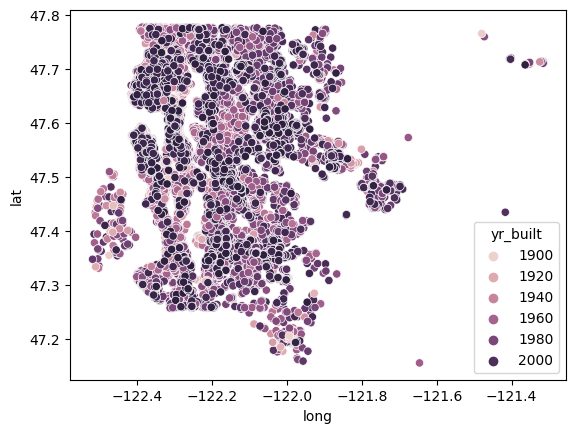

In [46]:
sns.scatterplot(data=df, x='long', y='lat', hue='yr_built'); 

We can clearly see the western concentration of the population and a lot of newer houses (built in 2000) close to the coastline, especially in the north. Besides that, in the very west there seems to be an island with mainly older houses.

## 2) Initial Hypotheses about the Dataset

Hypotheses related to the stakeholder: <br>
To buy a central neighborhood house in middle price range with right timing (within a year) it will
- H1) be older than 50 years and has not been renovated in the last 25 years or
- H2) has a below-average grade or
- H3) has a below-average livingsquare

## 3) Explore and clean the dataset



Before we start with the cleaning of the data, it is suitable to specify and define the stakeholders requests in terms of available parameters:<br>
a) lively, central neighborhood
b) middle price range
c) right timing (within a year)

- a) lively, central neighborhood <br>
The term "lively" is a bit vague and can be interpreted differently. So for a non-local it cannot be linked without domain knowledge to certain longitudes/latitudes or zip codes. The term "central neighborhood" on the other hand can be addressed directly to a - yet to be defined - subset of zip codes. One may either define "central" in geographic terms or "central neighborhood" in terms of an area with higher population density.<br>

- b) middle price range <br>
This is a rather concrete condition. But instead of using the price itself, we will address it by normalizing the price by estimating the price per squarefeet. Furthermore, we define "middle price range" by choosing the 40% to 60% percentiles.

- c) right timing (within a year) <br>
So, our stakeholder wants to time the equity market. For that purpose, we will generate a new variable called "month" to analyze if there is a month showing significant lower house prices than other months.

### Add/remove columns

In [47]:
# We create a copy of the original dataset and will adopt that one for our aims.
df2 = df.copy()

# As we want to know the right timing of buying within a year, we generate a 'month' column
df2['month'] = df2.date.dt.month

# Add prices for lot and living as prices per squarefeet
df2['price_lot_per_sqft'] =  df2['price'] / df2['sqft_lot']
df2['price_living_per_sqft'] =  df2['price'] / df2['sqft_living']

# For our purpose, we don't need sqft_above and sqft_basement, as these add up to sqft_living and we are only interested 
# in the overall size of the living area and overall lot size.
df2.drop(['sqft_above','sqft_basement'], axis=1, inplace=True)

# As the stakeholder set no further conditions relating to the interior of the house, we will skip variables such as "waterfront", 
# number of floors, bathrooms, bedrooms etc.
df2.drop(['bedrooms','bathrooms','floors','waterfront','view'], axis=1, inplace=True)

In [48]:
df2

id       date     price  sqft_living  sqft_lot  condition  \
0      7129300520 2014-10-13  221900.0         1180      5650          3   
1      6414100192 2014-12-09  538000.0         2570      7242          3   
2      5631500400 2015-02-25  180000.0          770     10000          3   
3      2487200875 2014-12-09  604000.0         1960      5000          5   
4      1954400510 2015-02-18  510000.0         1680      8080          3   
...           ...        ...       ...          ...       ...        ...   
21592   263000018 2014-05-21  360000.0         1530      1131          3   
21593  6600060120 2015-02-23  400000.0         2310      5813          3   
21594  1523300141 2014-06-23  402101.0         1020      1350          3   
21595   291310100 2015-01-16  400000.0         1600      2388          3   
21596  1523300157 2014-10-15  325000.0         1020      1076          3   

       grade  yr_built  yr_renovated  zipcode      lat     long  \
0          7      1955           0.0    98178  47.5112 -122.257   
1          7      1951        1991.0    98125  47.7210 -122.319   
2          6      1933           NaN    98028  47.7379 -122.233   
3          7      1965           0.0    98136  47.5208 -122.393   
4          8      1987           0.0    98074  47.6168 -122.045   
...      ...       ...           ...      ...      ...      ...   
21592      8      2009           0.0    98103  47.6993 -122.346   
21593      8      2014           0.0    98146  47.5107 -122.362   
21594      7      2009           0.0    98144  47.5944 -122.299   
21595      8      2004           0.0    98027  47.5345 -122.069   
21596      7      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  month  price_lot_per_sqft  \
0               1340        5650     10           39.274336   
1               1690        7639     12           74.288870   
2               2720        8062      2           18.000000   
3               1360        5000     12          120.800000   
4               1800        7503      2           63.118812   
...              ...         ...    ...                 ...   
21592           1530        1509      5          318.302387   
21593           1830        7200      2           68.811285   
21594           1020        2007      6          297.852593   
21595           1410        1287      1          167.504188   
21596           1020        1357     10          302.044610   

       price_living_per_sqft  
0                 188.050847  
1                 209.338521  
2                 233.766234  
3                 308.163265  
4                 303.571429  
...                      ...  
21592             235.294118  
21593             173.160173  
21594             394.216667  
21595             250.000000  
21596             318.627451  

[21597 rows x 17 columns]

### Filtering

Living central in King County basically means living in Seattle. Therefore, we seek to select all zip codes in that county that belong to the city of Seattle. Luckily, we can find [here](https://www.usmapguide.com/washington/seattle-zip-code-map/) a list which we will use.  [This map](https://statisticalatlas.com/county/Washington/King-County/Population) showing the distribution of population density in King County supports the argument to use Seattle zip codes only.

In [49]:
# zip codes in Seattle
zc_seattle = [98101 ,98102 ,98103 ,98104 ,98105 ,98106 ,98107 ,98108 ,98109 ,98110 ,98111 ,98112 ,98114 ,98115 ,98116 ,98117 ,98118 ,98119 ,98121 ,98122 ,98124 ,98125 ,98126 ,98129 ,98131 ,98132 ,98133 ,98134 ,98136 ,98138 ,98144 ,98145 ,98146 ,98148 ,98151 ,98154 ,98155 ,98158 ,98160 ,98161 ,98164 ,98166 ,98168 ,98170 ,98171 ,98174 ,98177 ,98178 ,98181 ,98184 ,98185 ,98188 ,98190 ,98191 ,98195 ,98198 ,98199]

In [50]:
# Filter only houses in Seattle
df2 = df2[df2['zipcode'].isin(zc_seattle)]
df2.shape

(8973, 17)

We still have 8,973 buy/sell transactions to work with. Counting the transactions where we don't know if the house has been renovated or not yields 1,646. Let us remove them, too.

In [51]:
df2.isna().sum()

id                          0
date                        0
price                       0
sqft_living                 0
sqft_lot                    0
condition                   0
grade                       0
yr_built                    0
yr_renovated             1646
zipcode                     0
lat                         0
long                        0
sqft_living15               0
sqft_lot15                  0
month                       0
price_lot_per_sqft          0
price_living_per_sqft       0
dtype: int64

In [52]:
df2 = df2.dropna()

### Testing the hypotheses

#### H1) be older than 50 years and has not been renovated in the last 25 years

In [53]:
# Estimating the "middle price range" for prices living per squarefeet
living40,living60 = df2.price_living_per_sqft.quantile([0.40, 0.60])

To test the first hypothesis, we plot the histogram for the living price per square feet and estimate the age of the houses within our price range.

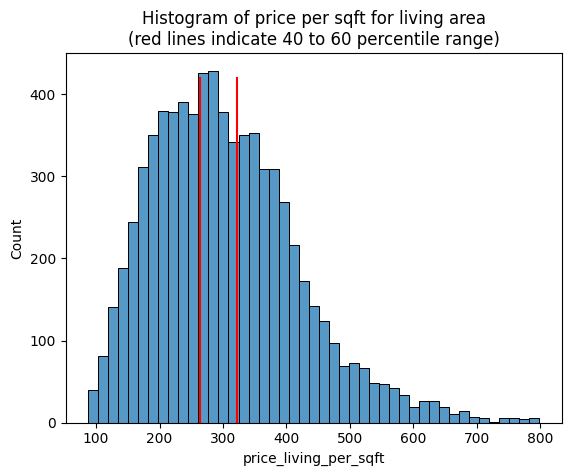

In [54]:
sns.histplot(data=df2, x="price_living_per_sqft")
plt.plot([living40, living40], [0, 420], color='r')
plt.plot([living60, living60], [0, 420], color='r')
plt.title('Histogram of price per sqft for living area' + '\n' + '(red lines indicate 40 to 60 percentile range)');

In [55]:
# generate a mask to select only mid-price range
mask1 = (living40 <= df2['price_living_per_sqft']) & (df2['price_living_per_sqft'] <= living60)

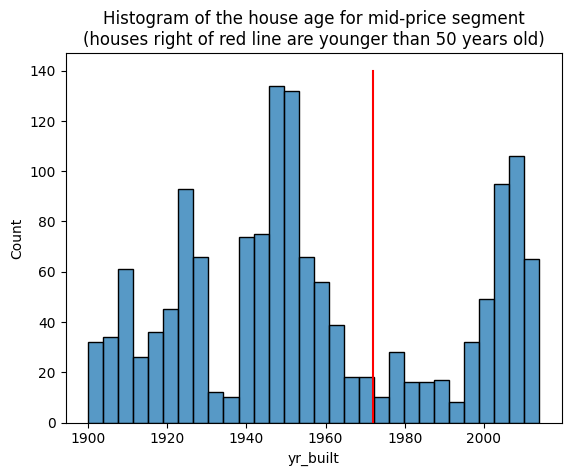

In [56]:
# plot age of houses for selected price range
sns.histplot(data=df2[mask1], x="yr_built", bins=30)
plt.plot([1972, 1972], [0, 140], color='r')
plt.title('Histogram of the house age for mid-price segment'+ '\n' + '(houses right of red line are younger than 50 years old)');

We can clearly see that there are houses younger than 50 years. So, at his point we can already say that **hypothesis H1 is wrong**. <br>
But still, let us have a look if the houses older than 50 years have all been renovated or not in the last 25 years.

In [57]:
# generate a mask to select only mid-price range older than 50 years
mask2 = (living40 <= df2['price_living_per_sqft']) & (df2['price_living_per_sqft'] <= living60) & (df2['yr_built']<=1972)

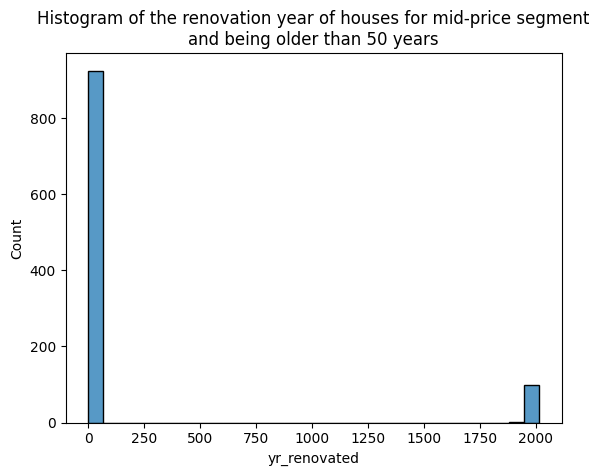

In [58]:
# plot histogram of the renovation year for mid-priced houses older than 50 year
sns.histplot(data=df2[mask2], x="yr_renovated", bins=30)
plt.title('Histogram of the renovation year of houses for mid-price segment'+ '\n' + 'and being older than 50 years');

So, the vast majority at 0 show that most of the old houses have not been renovated at all, but let's zoom into the last decades:

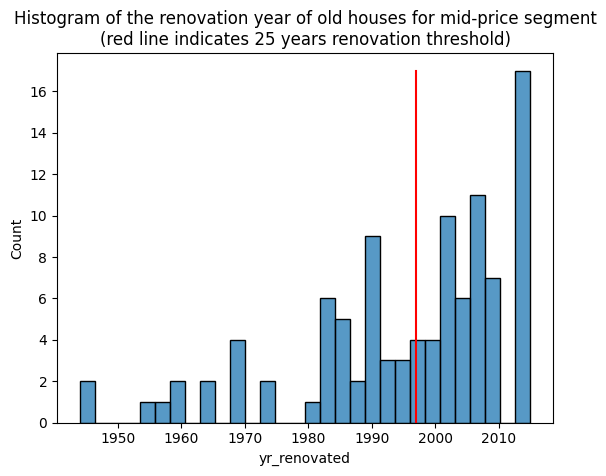

In [59]:
# generate a mask to select only mid-price range older than 50 years & have been renovated
mask3 = (living40 <= df2['price_living_per_sqft']) & (df2['price_living_per_sqft'] <= living60) & (df2['yr_built']<=1972) & (df2['yr_renovated']>1)

# plot histogram of the renovation year for mid-priced houses older than 50 year
sns.histplot(data=df2[mask3], x="yr_renovated", bins=30)
plt.plot([1997, 1997], [0, 17], color='r')
plt.title('Histogram of the renovation year of old houses for mid-price segment'+ '\n' + '(red line indicates 25 years renovation threshold)');

As we can see, even if we had only houses older than 50 years fitting to the conditions of the stakeholder (which is not the case), there are houses that have been renovated within the last 25 years, hence, **hypothesis H1 is wrong**.

#### H2) has a below-average grade

First let's visualise the grade distributions and calculate the overall mean grade for houses in Seattle, i.e. the center. Its a measure based on the King County grading system (between 1 - 13) and we will compare it with the data having constrains:

In [60]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df2['grade'], name='center grade'))
fig.add_trace(go.Histogram(x=df2[mask1].grade, name='center grade with mid-price constrains'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)

fig.update_layout(
    title_text='Histograms of the grade distributions', 
    xaxis_title_text='grade', 
    yaxis_title_text='count') 

fig.show()

In [61]:
df2['grade'].mean()

7.342568581957145

In [62]:
df2[mask1].grade.mean()

7.373723621511232

The numbers show that the grade for the houses does slightly increase using the stakeholders constrains compared to the overall grade. Therefore, **hypothesis H2 has been proven wrong**, as well.

#### H3) has a below-average livingsquare

Similar to hypothesis 2, we will calculate the average livingsquare for the center and compare it with the average livingsquare only in the 40% to 60% percentile range.

In [63]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df2['sqft_living'], name='center living size in sqft'))
fig.add_trace(go.Histogram(x=df2[mask1].sqft_living, name='center living size in sqft with mid-price constrains'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)

fig.update_layout(
    title_text='Histograms of the living sizes in sqft distributions', 
    xaxis_title_text='living size in sqft', 
    yaxis_title_text='count') 

fig.show()

In [64]:
df2['sqft_living'].mean()

1798.9323051726492

In [65]:
df2[mask1].sqft_living.mean()

1812.5908781484002

Again, the average slightly increases. So, the average size of the living area inside the house is a tiny bit higher applying the mid-range price constrain. Therefore, **hypothesis H3 has also been proven wrong**.

#### Summary of hypotheses

All three hypotheses that have been stated in the beginning have been proven to be wrong. Although these were not very provocative and seemed to be "no brainer", the examinations show an unexpected result emphasizing the need to look into the numbers.

### Market timing

To estimate the best time for buying a house, we will group the transactions in the center in the mid-price range by month:

In [66]:
df3 = df2[mask1].groupby(['month']).median()

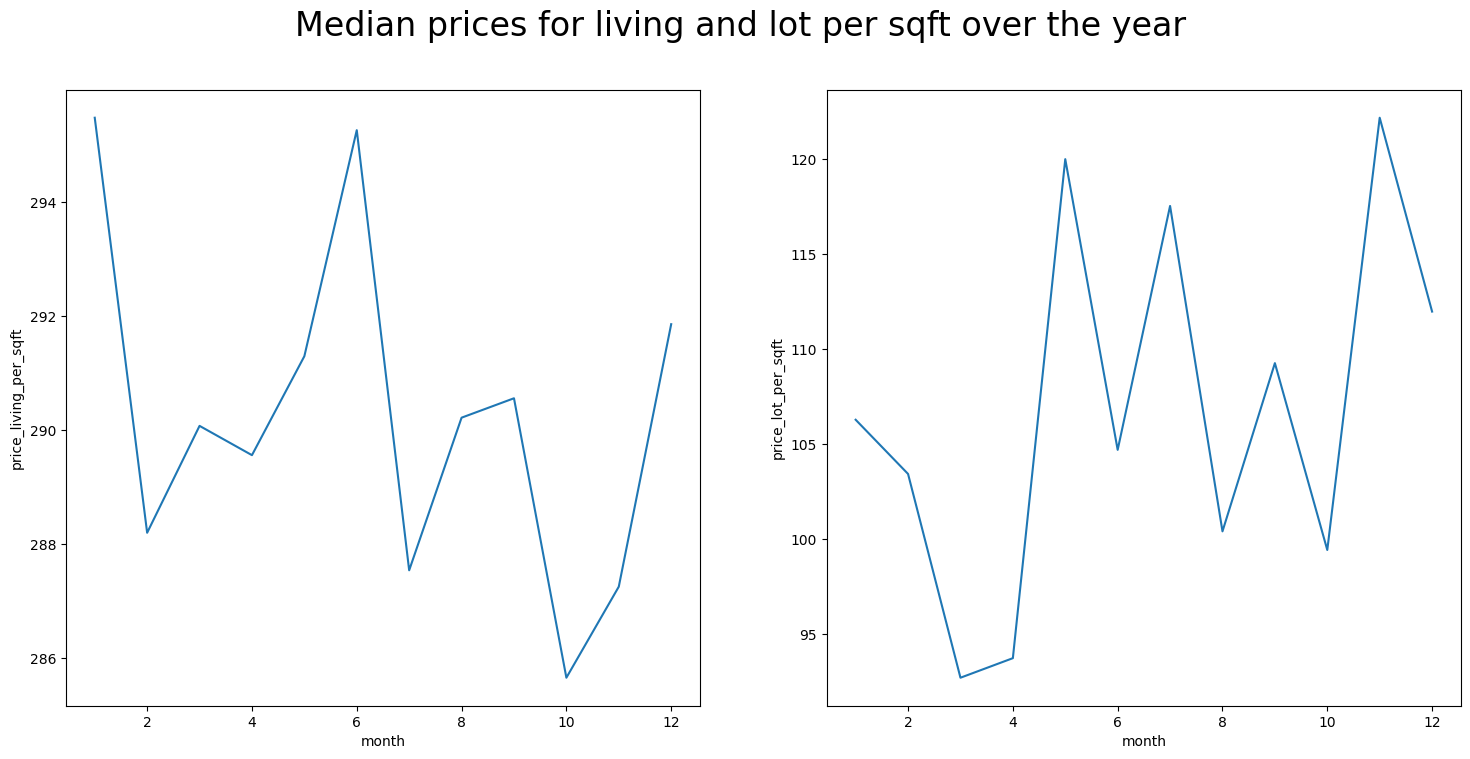

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

fig.suptitle('Median prices for living and lot per sqft over the year', fontsize=24)
sns.lineplot(ax=axes[0], data=df3["price_living_per_sqft"])
sns.lineplot(ax=axes[1], data=df3["price_lot_per_sqft"]);

Here, we provide two possible answers for our stakeholder. Do we want to maximize the living area, the best choice is probably to buy in october. Do we concern about a big lot spring seems to be the right time - so in march or april.

## 4) Recommendations for the stakeholder

Given the stakeholders constrains, we might suggest:
- an overall reasonable price in the mid-price segment for living area per squarefeet is between 263 USD and 321 USD
- avoid buying in january and june and look for houses in october for maximizing living area
- to maximize lot size, buy in march or april
- the living area should have a size of about 1,800 squarefeet
- the grade should at least be 7
- most houses have been built 1940 - 1960 and 2000 - 2015. So when age is a criterium, looking for houses in these built phases enhances the supply

# Aftermath

### Geographical plots

In [71]:
# Alex
fig = px.scatter_mapbox(df, lat='lat', lon='long', hover_name='id',
                        hover_data=['zipcode','price'], color=np.log10(df.price), # use log-transformed prices
                        color_continuous_scale=px.colors.sequential.Bluered,
                        zoom=8, height=800, opacity=0.5)

fig.update_traces(marker=dict(size=4, opacity=0.7),
                selector=dict(mode='markers'))

fig.layout.coloraxis.colorbar.title = 'log10(Price)'

fig.update_layout(mapbox_style='open-street-map',
                    height=500, margin={'r':0,'t':30,'l':0, 'b':0}, # sets the margin from the left, top, right and bottom order
                    title_text='Houses in King County color-coded by Price', title_x=0.5) # sets a title for the plot and centers it

fig.show()

In [70]:
# Fredi
# Buildings with secret basements
h3ss = px.scatter_mapbox(df, lat="lat", lon="long", color='price', size = 'sqft_living', hover_name="id", hover_data=["id", "price","sqft_living"],
                        color_discrete_sequence=px.colors.qualitative.Dark24, zoom=9,  center={'lon': -122.2, 'lat': 47.5 }, width=1000, height=600)
h3ss.update_layout(mapbox_style="open-street-map",
    title="Opportunities with secret basements by size",
    legend_title="Property price clusters",
    margin={"r":10,"t":40,"l":10,"b":10}
)
h3ss.show()

In [73]:
zips = df['zipcode']

# John
def map_zips(zips, title="Zip Codes in King's County"):
    import plotly.express as px
    zips = zips.copy()
    zips["_prefix"] = " ("
    zips["_suffix"] = ")"
    zips["hover"] = zips.index.astype(str) + zips["_prefix"] + zips["name"] + zips["_suffix"]
    fig = px.scatter_mapbox(
        zips,
        mapbox_style="stamen-toner",
        lat="latitude",
        lon="longitude",
        color="price",
        title=title,
        hover_name="hover",
        width=800,
        height=600,
        size="count",
        zoom=8.5
        )
    fig.show()
map_zips(zips, title="Zip Codes in King's Country: Average Price")

KeyError: 'name'

In [ ]:
map_zips()